## Linear Regression Model: Car Price Prediction 

Vamos a predecir el precio de un coche de segunda mano con el modelo de regresión lineal donde la variable explicada (el precio) viene explicada por las variables explicativas (Car Brand, Year, Sold Price, Present Price, KMS Driven, Fuel Type, Seller Type, Transmission Type, Owners). Es un problema de regresión porque estamos prediciendo un valor particular.

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Carga de los datos

In [378]:
datos = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/Python projects/Car Price Prediction Linear Regression Model/car data.csv")
datos.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Analisis inicial de los datos

In [380]:
# Vamos a ver el número de columnas y filas
datos.shape

(301, 9)

Tenemos 301 coches y 9 variables de cada coche

In [382]:
# Vamos a obtener información del data set
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Vemos el tipo de dato de cada una de las variables y que no se osbervan valores NA.

In [384]:
# Vamos a obtener los datos descriptivos del data set de las variables numéricas
datos.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [385]:
# Vamos a ver la distribución de las variables categoricas
print(datos.Fuel_Type.value_counts())
print(datos.Seller_Type.value_counts())
print(datos.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


#### Transformación variables categóricas

In [387]:
Fuel_Type = pd.get_dummies(datos["Fuel_Type"]).astype(int)
Seller_Type = pd.get_dummies(datos["Seller_Type"]).astype(int)
Transmission = pd.get_dummies(datos["Transmission"]).astype(int)

In [388]:
datos.drop(["Fuel_Type","Seller_Type","Transmission"],inplace=True,axis=1)
datos = pd.concat([datos,Fuel_Type,Seller_Type,Transmission],axis=1)

In [389]:
datos.drop(["Car_Name"],axis=1,inplace=True)

In [390]:
datos

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,0,1,0,1,0,0,1


Ya tenemos el DataFrame limpio y libre de vairables NA y de variables categóricas para poder aplicar el modelo de Regresión Lineal.

#### Estimación del Modelo

In [393]:
X = datos.drop(["Selling_Price"],axis=1)
y = datos["Selling_Price"]

In [394]:
(X_train, X_test, y_train, y_test) = train_test_split(X , y , test_size=0.2, random_state=1)

In [395]:
modelo = LinearRegression()

In [396]:
modelo.fit(X_train,y_train)

LinearRegression()

In [397]:
# Obtenemos los coeficientes estimados
print(modelo.intercept_)
modelo.coef_

-830.0282775963796


array([ 4.13270098e-01,  4.37233976e-01, -5.30613944e-06,  3.45912849e-01,
       -8.96352304e-01,  1.33415539e+00, -4.37803087e-01,  6.04639070e-01,
       -6.04639070e-01,  9.35071633e-01, -9.35071633e-01])

#### Evaluación del Modelo

In [399]:
trainig_datos_predict = modelo.predict(X_test)
trainig_datos_predict

array([ 7.86273200e+00,  2.96828691e+00, -5.90305107e-01,  4.21335952e+00,
        4.83175534e-01,  5.82053813e+00,  1.95679784e+00,  2.55809661e+00,
        7.70870833e+00,  9.78692192e-01,  8.13484343e+00,  3.51207180e+00,
        4.90669281e+00,  4.63905587e+00, -2.15886643e+00,  3.13874624e+00,
        7.98256903e+00,  6.75937638e+00,  6.90426580e+00,  8.01440587e+00,
        4.31168610e+00,  4.00336757e+00,  1.13040883e+01,  8.07939189e+00,
        9.54399823e+00,  3.52133877e+00,  3.80609808e+00,  1.06074722e+00,
       -6.01732475e-01, -6.19712043e-01,  1.32818516e-03, -1.28500691e+00,
        4.28533553e+00,  2.06769487e+01,  1.87563232e+01,  4.27292100e+00,
        3.48602852e+00,  1.66739677e+00, -4.38707072e-02,  5.78536030e+00,
        8.03940428e+00,  9.88367483e+00,  4.09684249e-01,  6.07997517e+00,
        5.88038915e+00,  4.32745252e+00,  7.37534505e+00,  5.86171335e+00,
        8.21129880e+00,  1.65455816e+00,  3.83033706e+00,  1.75047060e+00,
        2.51406796e+00,  

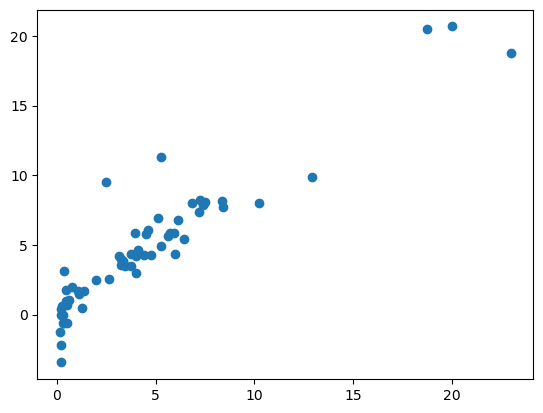

In [400]:
# Dibujamos las predicciones con los valores iniciales
plt.scatter(y_test,trainig_datos_predict)

In [401]:
# Error cuadrado del modelo 
error_cuadrado = metrics.r2_score(y_test,trainig_datos_predict)
error_cuadrado

0.8625260513316382

El error cuadrado del modelo es del 0,8625, por lo tanto, el modelo explica en un 86,25% la variable explicada.

#### Sistema de predicción

Vamos a generar un sistema de predicción según si añadimos una serie de datos y que nos de el precio estimado del coche

In [404]:
input_datos = (2014,5.59,27000,0,0,0,1,1,0,0,1)
# Cambiamos los datos de input a un numpy array 
input_datos_as_numpy_array = np.asarray(input_datos)
input_datos_as_numpy_array

array([2.014e+03, 5.590e+00, 2.700e+04, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00])

In [405]:
# Debemos modificar la np array pues estamos prediciendo por una instancia
input_datos_modificados = input_datos_as_numpy_array.reshape(1,-1)
input_datos_modificados

array([[2.014e+03, 5.590e+00, 2.700e+04, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]])

In [406]:
predicción = modelo.predict(input_datos_modificados)
predicción

C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.83033706])

Según nuestro modelo, y proporcionando los datos del primer coche del data frame, el Selling_Price tiene que ser de 3,83. 